In [ ]:
# OBJETIVO:
# Analisar o dataset "corpus" criado no notebook _4_tratamento.

In [1]:
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import string
from importlib.metadata import version
from nltk.probability import FreqDist
from nltk.text import Text
from nltk.tokenize import sent_tokenize, word_tokenize

In [2]:
version('seaborn')

'0.11.1'

In [ ]:
# baixa dados do NLTK
nltk.download('punkt')
nltk.download('stopwords')

In [3]:
# carrega o dataset "corpus" criado no notebook _4_tratamento
corpus = pd.read_csv('datasets/corpus.csv')
corpus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36264 entries, 0 to 36263
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Acordao         36264 non-null  object
 1   SumulaDerivada  36264 non-null  int64 
 2   Documento       36264 non-null  object
dtypes: int64(1), object(2)
memory usage: 850.1+ KB


In [4]:
%%time
docs = corpus['Documento']
# obtém os tokens por documento em forma de lista de listas de tokens, ignorando pontuação
tokens_by_doc = [[token for token in word_tokenize(doc, language='portuguese')
                  if token not in string.punctuation] for doc in docs]
# número de tokens por documento
num_tokens_by_doc = [len(tokens) for tokens in tokens_by_doc]

Wall time: 10min 23s


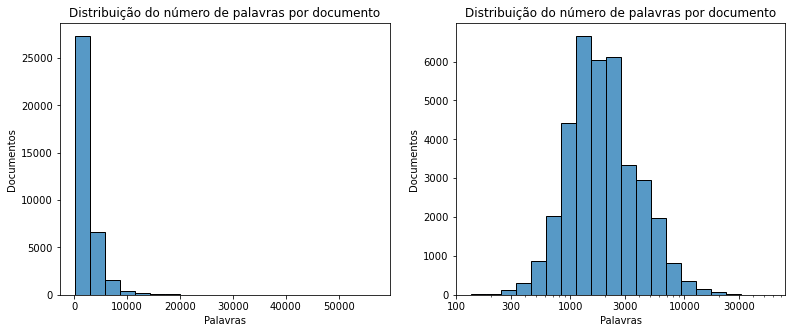

,Palavras por documento
count,36264.000000
mean,2474.172127
std,2255.130363
min,134.000000
25%,1198.000000
50%,1814.000000
75%,2930.000000
max,56845.000000


In [5]:
# histograma da distribuição de tokens em escala linear e logarítmica
fig, ax = plt.subplots(1, 2, figsize=(13, 5))
g_lin = sns.histplot(num_tokens_by_doc, bins=20, ax=ax[0])
g_lin.set(title='Distribuição do número de palavras por documento',
          xlabel='Palavras', ylabel='Documentos')
g_log = sns.histplot(num_tokens_by_doc, bins=20, log_scale=True, ax=ax[1])
g_log.set(title='Distribuição do número de palavras por documento', 
          xlabel='Palavras', ylabel='Documentos',
          xticks=[100, 300, 1000, 3000, 10000, 30000],
          xticklabels=['100', '300', '1000', '3000', '10000', '30000'])
plt.show()
# estatísticas da distribuição
pd.DataFrame(num_tokens_by_doc, columns=['Palavras por documento']).describe()

In [6]:
%%time
# obtém as sentenças por documento em forma de lista de listas de sentenças
sents_by_doc = [sent_tokenize(doc, language='portuguese') for doc in docs]
# número de sentenças por documento
num_sents_by_doc = [len(sents) for sents in sents_by_doc]

Wall time: 3min 19s


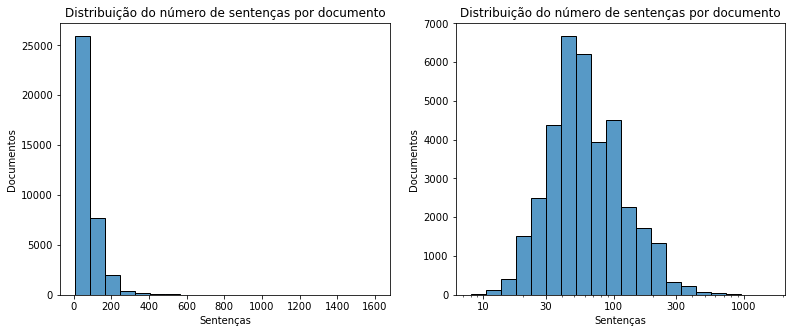

,Sentenças por documento
count,36264.000000
mean,76.257059
std,62.856386
min,8.000000
25%,40.000000
50%,56.000000
75%,91.000000
max,1600.000000


In [7]:
# histograma da distribuição de sentenças em escala linear e logarítmica
fig, ax = plt.subplots(1, 2, figsize=(13, 5))
g_lin = sns.histplot(num_sents_by_doc, bins=20, ax=ax[0])
g_lin.set(title='Distribuição do número de sentenças por documento',
          xlabel='Sentenças', ylabel='Documentos')
g_log = sns.histplot(num_sents_by_doc, bins=20, log_scale=True, ax=ax[1])
g_log.set(title='Distribuição do número de sentenças por documento', 
          xlabel='Sentenças', ylabel='Documentos',
          xticks=[10, 30, 100, 300, 1000],
          xticklabels=['10', '30', '100', '300', '1000'])
plt.show()
# estatísticas da distribuição
pd.DataFrame(num_sents_by_doc, columns=['Sentenças por documento']).describe()

In [8]:
# stopwords padrão para a lingua portuguesa
stopwords = nltk.corpus.stopwords.words('portuguese')
print(len(stopwords))
print(stopwords)

204
['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'e

In [9]:
# converte a relação de tokens em caixa baixa e descarta os de um caractere e as stopwords
tokens_no_stop = [token.lower() for tokens in tokens_by_doc for token in tokens
                  if len(token) > 1 and not token.lower() in stopwords]
# calcula a distribuição de frequência
fdist = FreqDist(tokens_no_stop)
print('Tokens (não distintos) exceto pontuação:', sum([len(tokens) for tokens in tokens_by_doc]))
print('Tokens (não distintos) exceto pontuação, com 1 caractere e stopwords:', len(tokens_no_stop))
print('Tokens distintos:', len(fdist))

Tokens (não distintos) exceto pontuação: 89723378
Tokens (não distintos) exceto pontuação, com 1 caractere e stopwords: 52451994
Tokens distintos: 151641


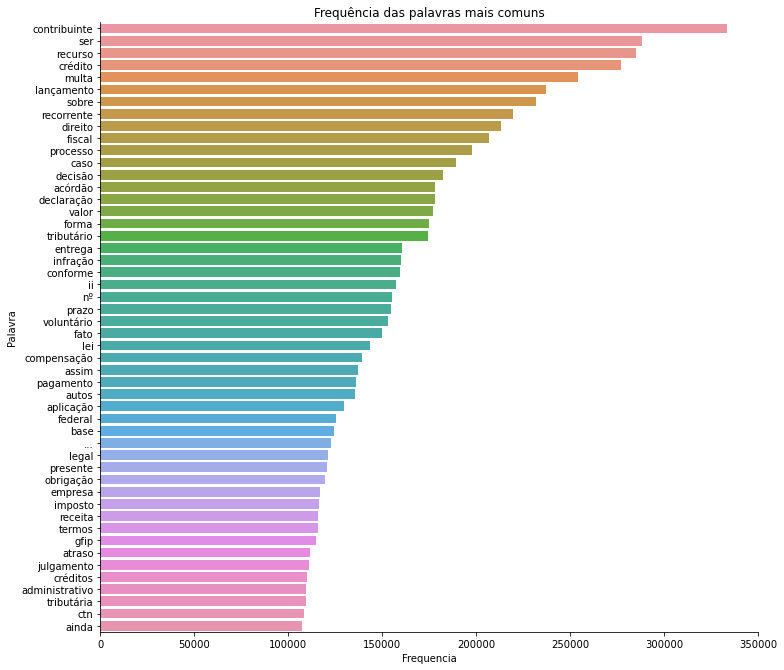

In [10]:
# exibe a frequência das palavras mais comuns
top = fdist.most_common(50)
df = pd.DataFrame(top, columns=['Palavra', 'Frequencia'])
g = sns.catplot(x='Frequencia', y='Palavra', data=df, kind='bar', height=9, aspect=1.2)
g.set(title='Frequência das palavras mais comuns')
plt.show()

In [11]:
# função para obter uma lista de precedentes de súmula disponíveis no corpus,
# dado o número da súmula, vazia se não houver
def get_precedentes(num_sumula):
    df = corpus[corpus['SumulaDerivada'] == num_sumula]
    return df['Acordao'].tolist()

# para cada súmula vigente, relaciona os respectivos precedentes disponíveis no corpus
sumulas = pd.read_csv('datasets/sumulas.csv')
precs_by_sumula = dict((key, get_precedentes(key)) for key in sumulas['Sumula'])
# identifica as súmulas com e sem precedentes no corpus
nenhum_prec = {k: v for k, v in precs_by_sumula.items() if not v}
algum_prec = {k: v for k, v in precs_by_sumula.items() if v}
print('Súmulas sem precedentes no corpus:', len(nenhum_prec))
print('Súmulas com algum precedente no corpus:', len(algum_prec))

Súmulas sem precedentes no corpus: 94
Súmulas com algum precedente no corpus: 64


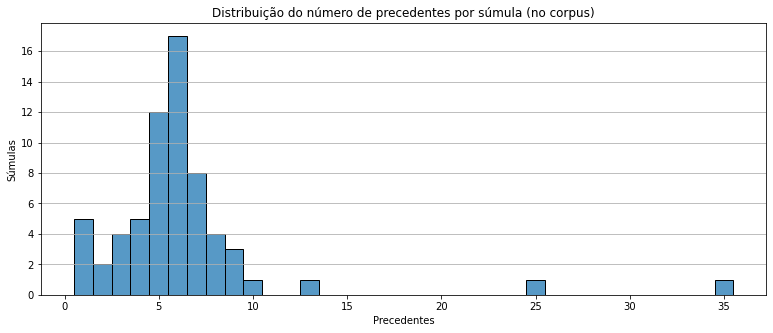

,Precedentes por súmula (no corpus)
count,64.000000
mean,6.265625
std,4.941699
min,1.000000
25%,4.750000
50%,6.000000
75%,7.000000
max,35.000000


In [12]:
# histograma da distribuição do número de precedentes por súmula (no corpus)
num_precs = [len(lista) for lista in precs_by_sumula.values() if lista]
fig, ax = plt.subplots(1, 1, figsize=(13, 5))
g = sns.histplot(num_precs, discrete=True, ax=ax)
g.set(title='Distribuição do número de precedentes por súmula (no corpus)',
          xlabel='Precedentes', ylabel='Súmulas')
g.grid(axis='y')
plt.show()
# estatísticas da distribuição
pd.DataFrame(num_precs, columns=['Precedentes por súmula (no corpus)']).describe()